In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns

In [105]:
#reglage du dimension
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

#Importation du donner brute
data = pd.read_csv("datasets/english_education.csv")
data

,town11cd,town11nm,population_2011,size_flag,rgn11nm,coastal,coastal_detailed,ttwa11cd,ttwa11nm,ttwa_classification,job_density_flag,income_flag,university_flag,level4qual_residents35_64_2011,ks4_2012_2013_counts,key_stage_2_attainment_school_year_2007_to_2008,key_stage_4_attainment_school_year_2012_to_2013,level_2_at_age_18,level_3_at_age_18,activity_at_age_19_full_time_higher_education,activity_at_age_19_sustained_further_education,activity_at_age_19_appprenticeships,activity_at_age_19_employment_with_earnings_above_0,activity_at_age_19_employment_with_earnings_above_10_000,activity_at_age_19_out_of_work,highest_level_qualification_achieved_by_age_22_less_than_level_1,highest_level_qualification_achieved_by_age_22_level_1_to_level_2,highest_level_qualification_achieved_by_age_22_level_3_to_level_5,highest_level_qualification_achieved_by_age_22_level_6_or_above,highest_level_qualification_achieved_b_age_22_average_score,education_score
0,E34000007,Carlton in Lindrick BUA,5456.0,Small Towns,East Midlands,Non-coastal,Smaller non-coastal town,E30000291,Worksop and Retford,Majority town and city (small),Residential,Higher deprivation towns,No university,Low,65,65.000000,70.769231,72.307692,50.769231,30.769231,21.538462,NaN,52.307692,36.923077,NaN,NaN,34.9,39.7,NaN,3.323077,-0.533750
1,E34000016,Dorchester (West Dorset) BUA,19060.0,Small Towns,South West,Non-coastal,Smaller non-coastal town,E30000046,Dorchester and Weymouth,Majority town and city (small),Working,Mid deprivation towns,No university,Medium,239,69.058296,71.129707,85.714286,60.084034,41.841004,13.389121,10.041841,51.046025,24.686192,4.184100,NaN,21.7,44.6,33.3,3.732218,1.952019
2,E34000020,Ely BUA,19090.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000186,Cambridge,Majority town and city (Large Towns),Working,Lower deprivation towns,No university,Medium,155,71.428571,56.129032,83.870968,45.806452,35.483871,10.967742,7.741935,57.419355,27.741935,NaN,NaN,34.4,31.2,32.5,3.548387,-1.044128
3,E34000026,Market Weighton BUA,6429.0,Small Towns,Yorkshire and The Humber,Non-coastal,Smaller non-coastal town,E30000220,Hull,Majority town and city (Large Towns),Residential,Lower deprivation towns,No university,Medium,58,70.967742,53.448276,91.228070,49.122807,25.862069,25.862069,NaN,58.620690,31.034483,NaN,NaN,NaN,66.1,NaN,3.482759,-1.249262
4,E34000027,Downham Market BUA,10884.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000225,King's Lynn,Majority rural,Mixed,Higher deprivation towns,No university,Low,93,78.048780,62.365591,78.494624,40.860215,26.881720,20.430108,15.053763,55.913978,30.107527,15.053763,NaN,32.6,44.2,NaN,3.161290,-1.169078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,K06000004,Chester BUASD,86011.0,Large Towns,North West,Non-coastal,Large non-coastal town,K01000011,Chester,Majority town and city (Large Towns),Working,Higher deprivation towns,University,Medium,739,70.721925,61.028417,80.623306,46.205962,32.476319,19.485792,9.066306,45.331529,18.267930,7.983762,2.0,27.3,43.0,27.7,3.474966,-0.810935
1100,NaN,Inner London BUAs,NaN,Inner London BUA,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630,69.910009,63.219651,84.883815,53.473351,49.269184,14.023549,5.952091,30.073082,10.117743,7.182298,1.9,19.0,44.0,35.1,3.784572,0.067591
1101,NaN,Outer london BUAs,NaN,Outer london BUA,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52998,74.514463,66.583645,86.607008,57.053315,48.473527,14.249594,7.462546,36.388166,15.551530,5.520963,1.7,18.8,42.5,37.0,3.864033,1.262410
1102,NaN,Other Small BUAs,NaN,Other Small BUAs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59743,77.351640,65.125621,86.396973,54.487459,37.301441,18.966239,12.269220,50.265303,24.337579,5.498552,1.7,23.3,44.9,30.1,3.656512,1.221877


In [106]:
            """ EDA du donner de l'education pour savoir l'ecart entre l'educaton de la compagne et les grand ville en terme de resultat"""
""" Analyse de de form: -la target est le Close
                        - il y a 1104 ligne et 31 colonne
                        

"""
data.shape

(1104, 31)

In [107]:
""" il y a 17 variable de type float et 13 de type object et 1 de type int64 """
data.dtypes.value_counts()

float64    17
object     13
int64       1
dtype: int64

In [108]:
""" il y a plusieur dooner complet et quelque donner manquant comme le highest_level_qualification_achieved_by_age_22_less_than_level_1 qui est a 70% manquant """


data.isnull().sum()/data.shape[0]

town11cd                                                             0.003623
town11nm                                                             0.000000
population_2011                                                      0.003623
size_flag                                                            0.000000
rgn11nm                                                              0.001812
coastal                                                              0.003623
coastal_detailed                                                     0.003623
ttwa11cd                                                             0.003623
ttwa11nm                                                             0.003623
ttwa_classification                                                  0.003623
job_density_flag                                                     0.003623
income_flag                                                          0.003623
university_flag                                                 

<AxesSubplot:>

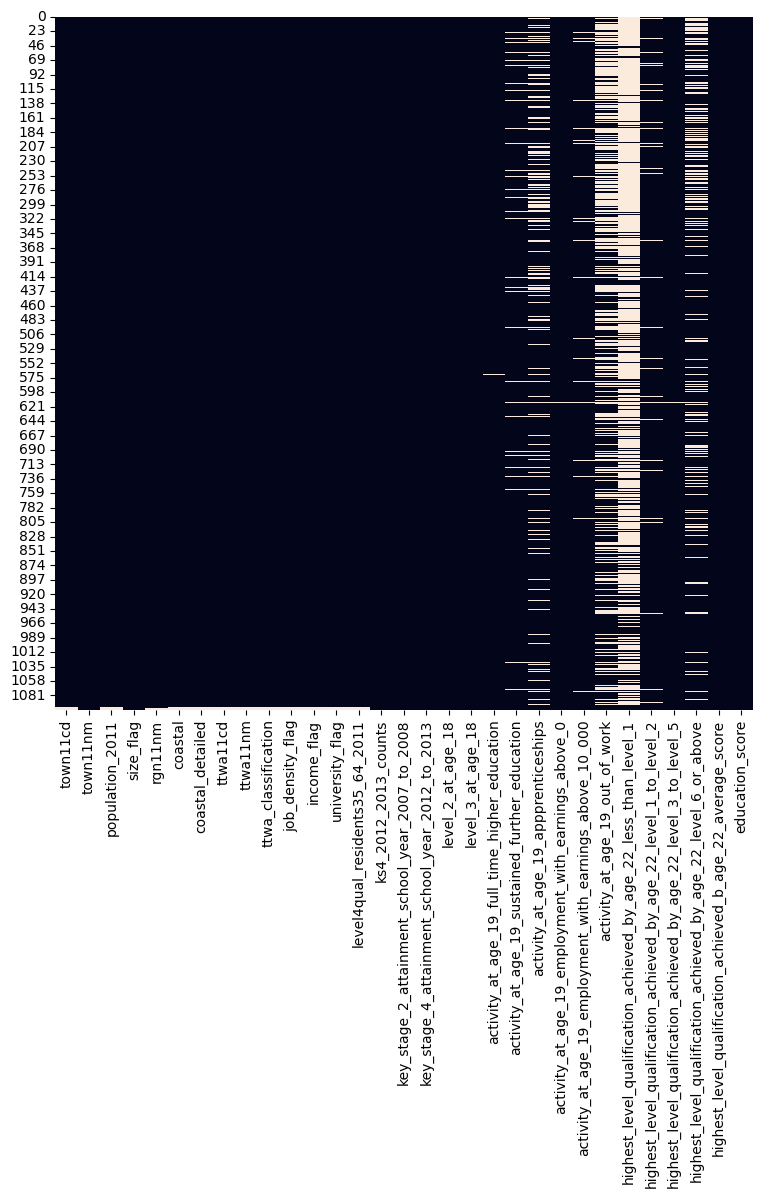

In [109]:
"""voici la representation du donner donner manquant et complet"""
plt.figure(figsize=(9,9))
sns.heatmap(data.isna(),cbar=False)

In [110]:
"""on a supprimer ses donner puisse qu'ils sont inutile a nos donner"""
data = data.drop(["town11cd","town11nm","ttwa11cd","ttwa11nm"],axis=1)


In [111]:
#voici tous les carateristique objet et leur valeur unique
for col in data.select_dtypes("object"):
    print(f"{col:-<50}{data[col].unique()}")

size_flag-----------------------------------------['Small Towns' 'Medium Towns' 'Large Towns' 'City' 'Inner London BUA'
 'Outer london BUA' 'Other Small BUAs' 'Not BUA']
rgn11nm-------------------------------------------['East Midlands' 'South West' 'East of England' 'Yorkshire and The Humber'
 'North West' 'West Midlands' 'South East' 'North East' 'London' nan]
coastal-------------------------------------------['Non-coastal' 'Coastal' nan]
coastal_detailed----------------------------------['Smaller non-coastal town' 'Large non-coastal town'
 'Smaller seaside town' 'Large seaside town' 'Smaller other coastal town'
 'Large other coastal town' 'Cities' nan]
ttwa_classification-------------------------------['Majority town and city (small)' 'Majority town and city (Large Towns)'
 'Majority rural' 'Majority conurbation' nan]
job_density_flag----------------------------------['Residential' 'Working' 'Mixed' nan]
income_flag---------------------------------------['Higher deprivation towns' '

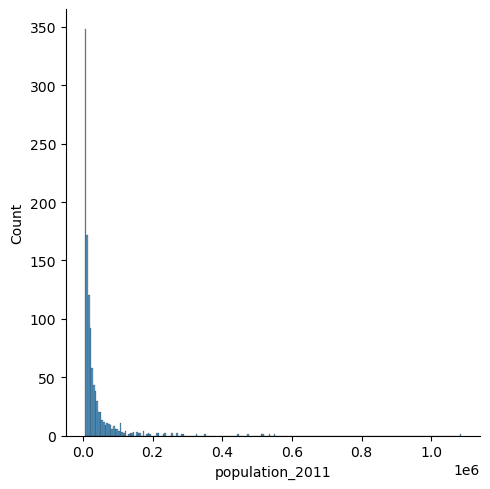

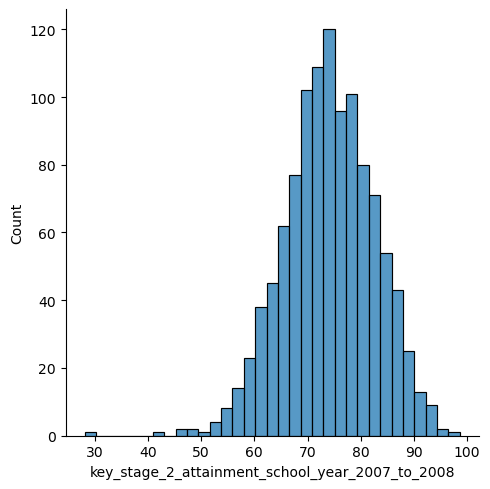

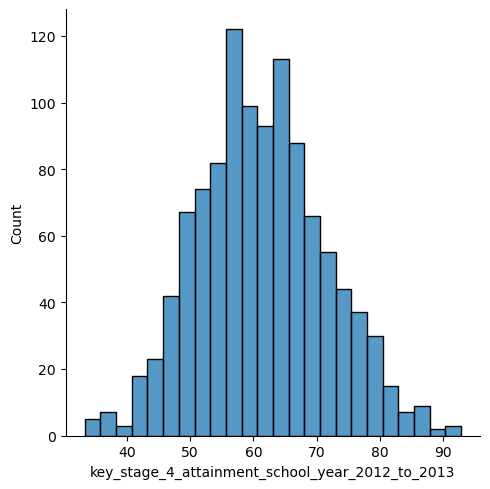

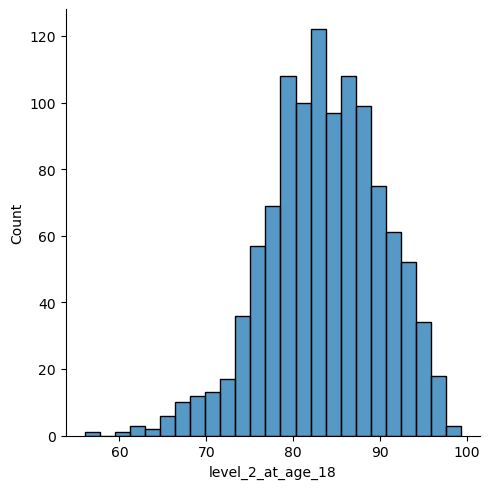

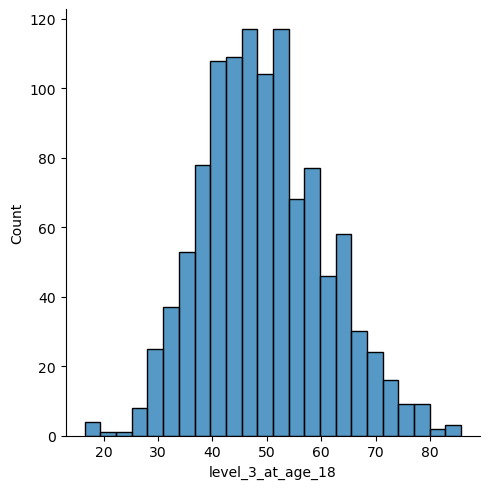

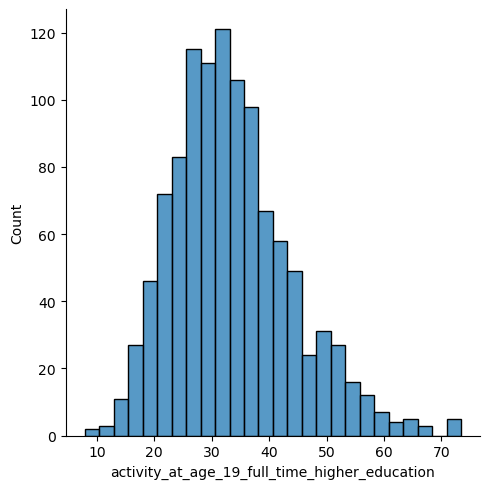

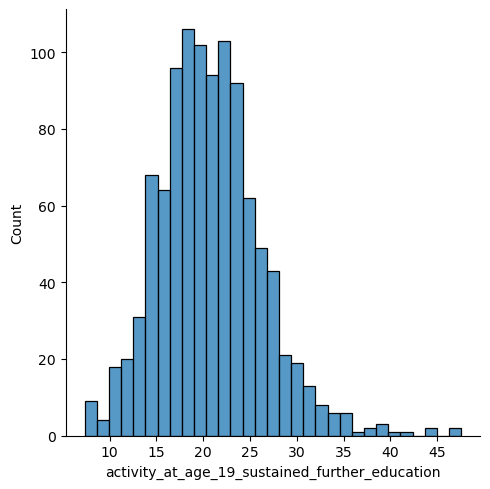

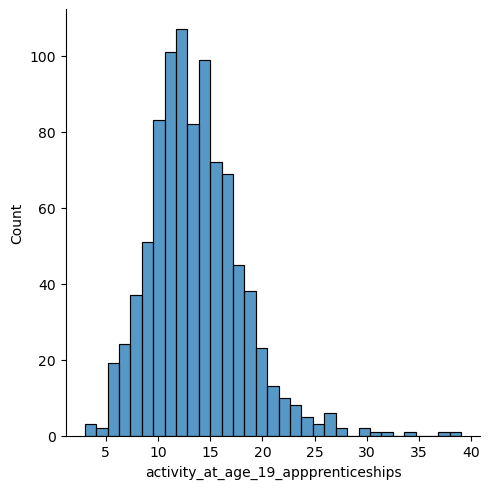

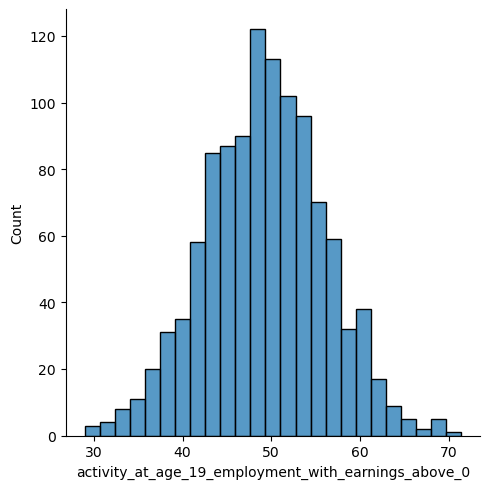

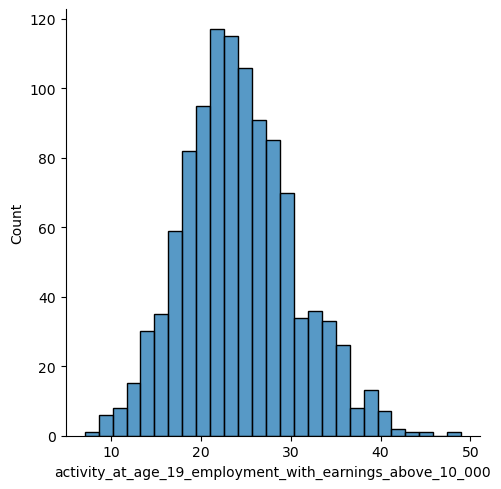

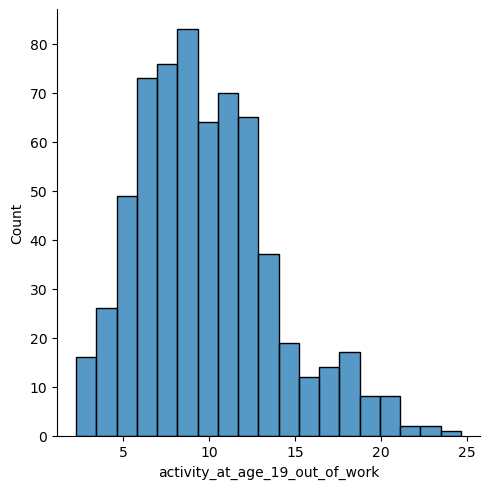

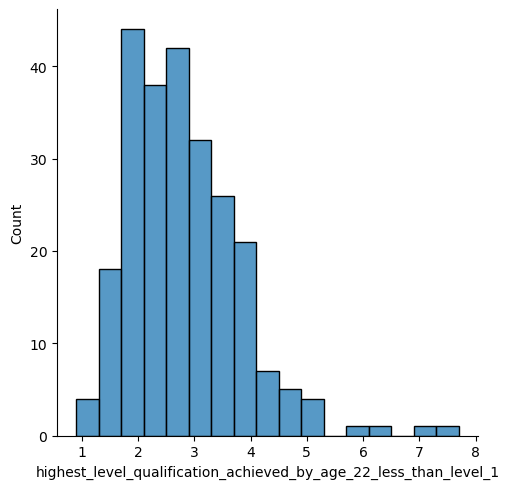

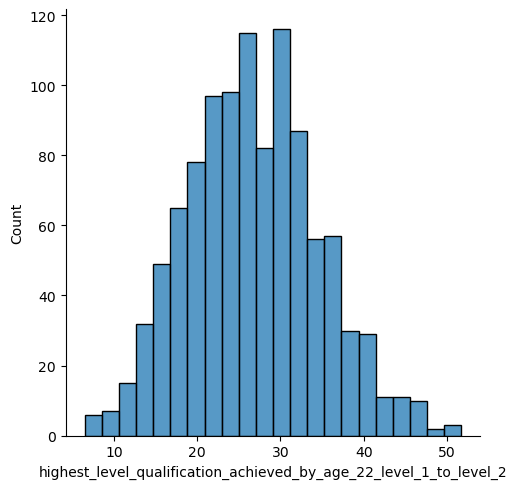

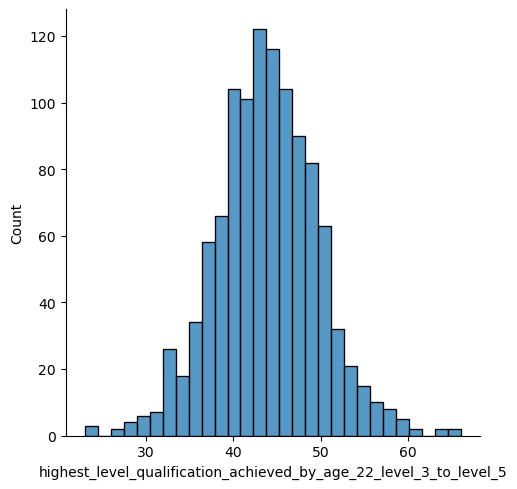

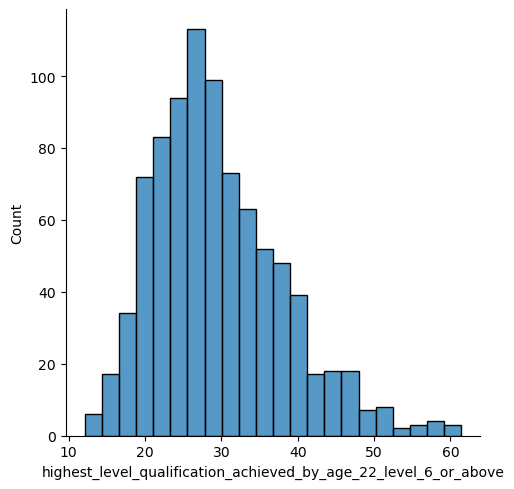

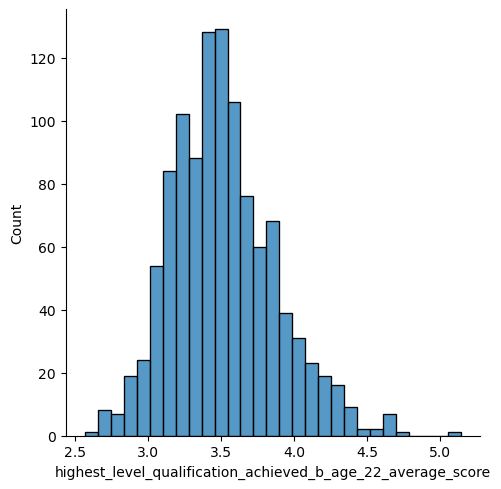

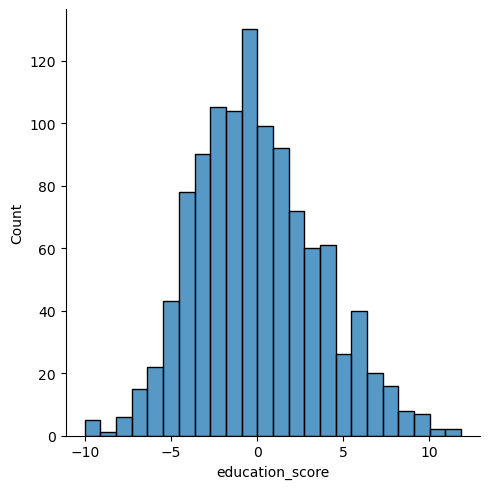

In [112]:
"""Analyse de fond: voici le representation graphique des variables de type float et on remarque que les majorité des valeur sont repartie de maniere similaire"""
for col in data.select_dtypes("float"):
    sns.displot(data[col])

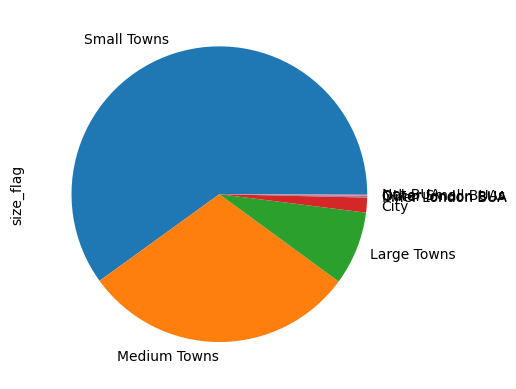

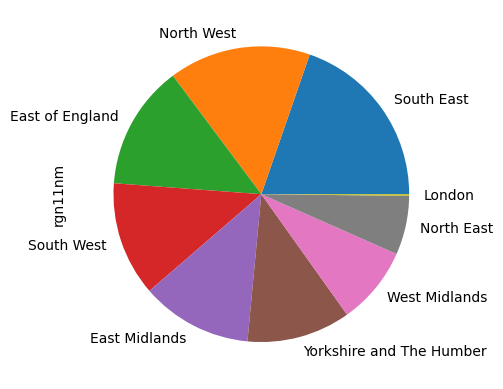

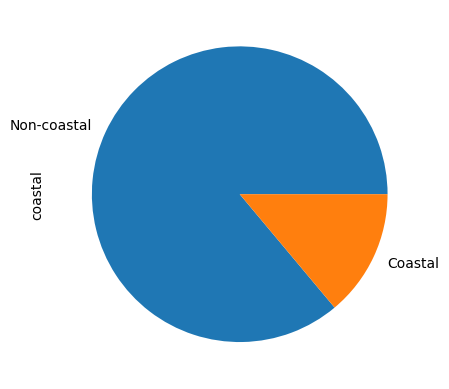

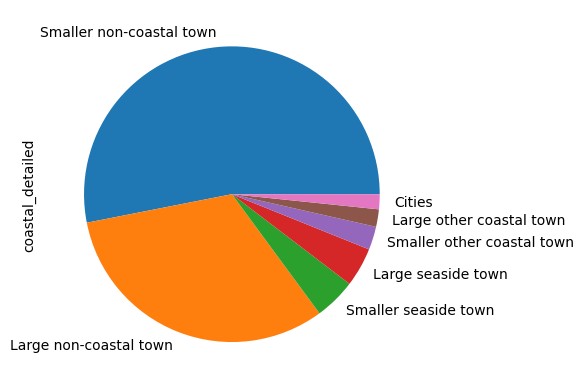

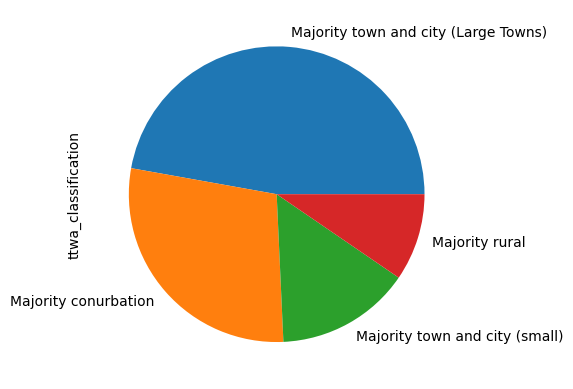

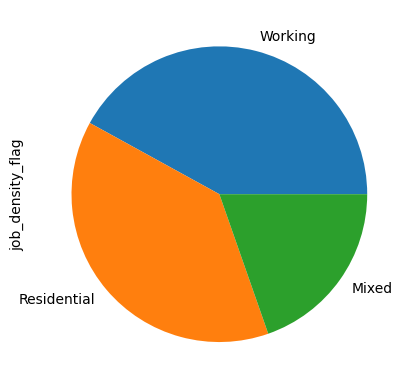

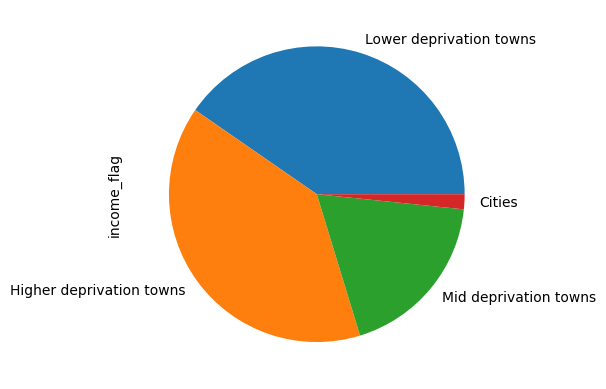

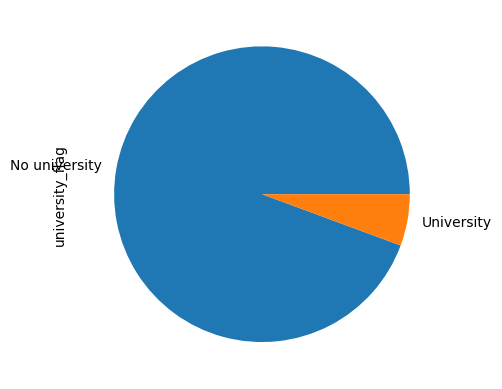

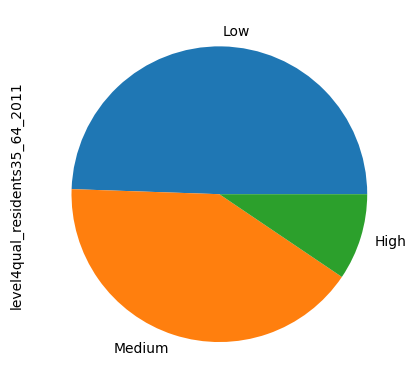

In [113]:
""" voici la representation graphique des donner de type object"""
for col in data.select_dtypes("object"):
    plt.figure()
    data[col].value_counts().plot.pie()

In [114]:
""" voici le coefficient de corelation par rapport au education_score et on remarque que 7 variable sont corréler  et 3 variable 
a une coefficient inferieur a -0.5 qui veut dire en correlation  inverse  """
data.corr()["education_score"]

population_2011                                                     -0.114396
ks4_2012_2013_counts                                                -0.014953
key_stage_2_attainment_school_year_2007_to_2008                      0.830348
key_stage_4_attainment_school_year_2012_to_2013                      0.906634
level_2_at_age_18                                                    0.745959
level_3_at_age_18                                                    0.937401
activity_at_age_19_full_time_higher_education                        0.876638
activity_at_age_19_sustained_further_education                      -0.323529
activity_at_age_19_appprenticeships                                 -0.127444
activity_at_age_19_employment_with_earnings_above_0                 -0.112443
activity_at_age_19_employment_with_earnings_above_10_000            -0.281246
activity_at_age_19_out_of_work                                      -0.554316
highest_level_qualification_achieved_by_age_22_less_than_level_1

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [116]:
                                """ Preprocessing"""
""" on separer les donner en deux categories train et test qui est 80% pour le train et 20% pour le test"""
train_set,test_set = train_test_split(data,test_size=0.2,random_state=0)

In [117]:
""" on encode le variable de type objet pour qu'il se transforme en chiffre"""
def encodage(data):
    label_encoder = LabelEncoder()
    for col in data.select_dtypes("object"):
        data[col] = label_encoder.fit_transform(data[col])
    return data

In [118]:
""" on efface les valeur manquant"""
def imputation(data):
    data = data.dropna(axis=0)
    return data

In [119]:
""" fonction qui separe le target et les autre variable"""
def preprocessing(data):
    data = encodage(data)
    data = imputation(data)
    y = data["education_score"]
    x = data.drop("education_score",axis=1)
    return x,y

In [120]:
x_train,y_train = preprocessing(train_set)
x_test,y_test = preprocessing(test_set)


In [121]:
                                         """Model"""
model = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42))

In [122]:
""" cette fonction vise a entrainer les donner du train set et evaluer le test set puis mesurer la performance et l'erreur """
def evaluation(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    print(model.score(x_test,y_test))
    
    err = np.abs(y_test-y_predict)
    
    mse = mean_squared_error(y_test, y_predict)
    print("Mean Squared Error:", mse)
    
    # Utiliser R^2 pour évaluer la performance
    r2 = r2_score(y_test, y_predict)
    print("R^2 Score:", r2)
    mse = mean_squared_error(y_test, y_predict)
    print("Mean Squared Error (MSE):", mse)

    # Calculer l'erreur absolue moyenne (MAE)
    mae = mean_absolute_error(y_test, y_predict)
    print("Mean Absolute Error (MAE):", mae)
    plt.hist(err,bins=50)

   

    

0.975179735491951
Mean Squared Error: 0.16301073242685457
R^2 Score: 0.975179735491951
Mean Squared Error (MSE): 0.16301073242685457
Mean Absolute Error (MAE): 0.30333785147298725


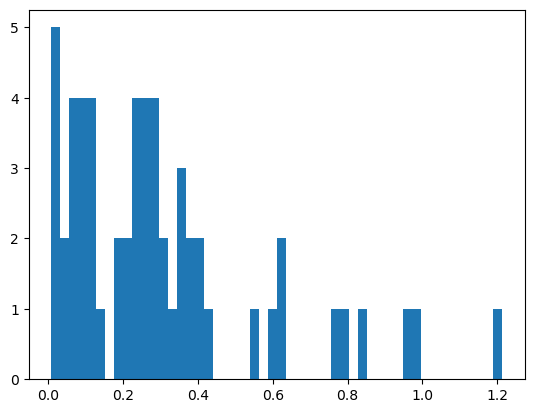

In [123]:
""" on peut endeduir que sur 97% que notre model a evaluer qu'il y a un lien entre le resultat de l'education de la compagne et 
les grande ville """
evaluation(model)